<a href="https://colab.research.google.com/github/Neil-Kloper/hello-world/blob/master/Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description –Image classification using CNNs in Keras (COPY)

### Data Description:
You are provided with a dataset of  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the projectis to create a classifier capable of determining a plant's species from a photo.

### Dataset:
The dataset can be download from Olympus. The data file names are: 
* images.npy
* Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are  also  put  into  the  Labels.csv.  So  that  you  can  work  on  the  data/project  seamlessly  without  worrying  about  the  high  data volume.

The followingcode was used to convert the large dataset of images to numpy array:
```
#Importnecessarylibraries.
import math
import numpy as np
import pandas as pd
from glob import glob
data_path='/content/drive/MyDrive/ColabNotebooks/data/plant_seedlings/train.zip'
!mkdirdataset
# Extract the files from dataset to temp_train and temp_test folder (asthedatasetisazipfile.)
from zipfile import ZipFile 
with ZipFile(data_path,'r') as zip:
  zip.extractall('./dataset')
path = "/content/dataset/*/*.*"# The path to all images in training set. (*meansincludeallfoldersandfiles.)
files = glob(path)

trainImg = [] #Initialize empty list to store the image data as numbers.
trainLabel = []#Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing obtain labels.
for img in files:
  '''Append the image data to train Img list .Append the labels to train Label list.'''
  print(str(j)+"/"+str(num),end="\r")
  trainImg.append(cv2.resize(cv2.imread(img),(128,128)))# Get image (with resizing to 128x128)
  trainLabel.append(img.split('/')[-2])# Get image label (folder name contains the class to which the image belong)
  j+=1

trainImg = np.asarray(trainImg)# Train images set 
trainLabel = pd.DataFrame(trainLabel,columns=["Label"])# Train labels set
print(trainImg.shape)
print(trainLabel.shape)
trainLabel.to_csv('Labels.csv',index=False)
np.save('plantimages',trainImg)
```  
  Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/data?select=train

#### Note: 
For project purposes, download the data provided on Olympus.

Context:Can you differentiate a weed from a crop seedling?The ability to do so effectively can mean better crop yields and better stewardship of the environment.The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

### Objective:
To implement the techniques learnt as a part of the course.

### Learning Outcomes:
* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

### Part 1: load the data
 Import the libraries, load dataset, print shape of data, visualize the images in dataset.

In [1]:
import numpy as np
import pandas as pd

images = np.load('/content/drive/MyDrive/PGP AIML Projects Data/images.npy')
labels = pd.read_csv('/content/drive/MyDrive/PGP AIML Projects Data/Labels.csv')
images.shape, labels.shape

((4750, 128, 128, 3), (4750, 1))

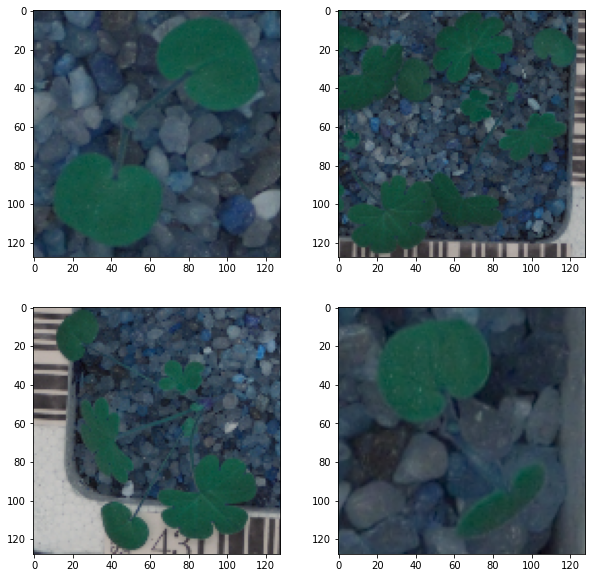

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(images[100])
ax[1][0].imshow(images[101])
ax[0][1].imshow(images[102])
ax[1][1].imshow(images[103]);

### Part 2: Data Pre-processing:
Normalization, Gaussian Blurring, and Visualize data after pre-processing.

In [3]:
# Tensorflow_addons version 12.1 has the gaussian filter function which is why I need to update here
!pip install tensorflow_addons --upgrade

     |████████████████████████████████| 706kB 14.1MB/s 


In [4]:
import tensorflow_addons as tfa
tfa.__version__

'0.12.1'

In [5]:
count = 0
for image in images:
  images[count] = tfa.image.gaussian_filter2d(images[count], filter_shape=[5,5], sigma=.2) # This applies a mild Gaussian Blur, in testing milder blurs had a better effect of mitigating overfitting.
  count += 1

In [6]:
images = images.astype('float32')

images /= 255

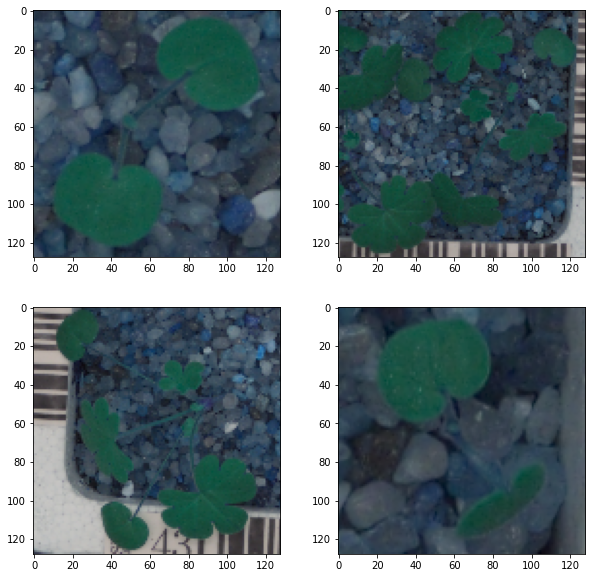

In [7]:
# Same images as before, now with preprocessing.
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(images[100])
ax[1][0].imshow(images[101])
ax[0][1].imshow(images[102])
ax[1][1].imshow(images[103]);

### Part 3: Make data compatible:
  * Convert labelsto one-hot-vectors.
  * Print the label for y[0].
  * Split the dataset into training,testing, and validation set.(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
  * Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [8]:
from tensorflow.keras.utils import to_categorical

labels_ohe = pd.get_dummies(labels.Label)
labels_ohe.head(1)

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_v, y_train, y_v = train_test_split(images, labels_ohe, test_size=.3)
x_valid, x_test, y_valid, y_test = train_test_split(x_v, y_v, test_size=.5)

In [10]:
y_valid.head()

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
329,0,0,0,0,0,0,0,0,0,0,1,0
387,0,0,0,0,0,0,0,0,0,0,1,0
3148,0,0,0,0,0,0,0,0,1,0,0,0
4053,1,0,0,0,0,0,0,0,0,0,0,0
2728,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
# We can see that the image data is already in an apropriate format.
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (3325, 128, 128, 3)
y_train shape: (3325, 12)
x_valid shape: (712, 128, 128, 3)
y_valid shape: (712, 12)
x_test shape: (713, 128, 128, 3)
y_test shape: (713, 12)


### Part 4: Building CNN:
  * Define layers.
  * Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.experimental import preprocessing as preprocessing

In [13]:
### As an additional preprocessing step I used random flip and random contrast for data augmentation
### This step was built into the model so I did not show any image samples.

model = keras.Sequential([
                          preprocessing.RandomFlip(),
                          preprocessing.RandomContrast(.1),

                          layers.Conv2D(filters=32, kernel_size=[5,5], activation='relu'),# may need to add input size, testing skipping this step
                          layers.MaxPool2D(pool_size=[2,2]),
                          layers.Conv2D(filters=64, kernel_size=[5,5], activation='relu'),
                          layers.MaxPool2D(pool_size=[2,2]),
                          layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
                          layers.MaxPool2D(pool_size=[2,2]),

                          layers.Flatten(),
                          layers.Dropout(rate=.3),
                          layers.Dense(units=144, activation='relu'),
                          layers.BatchNormalization(),
                          layers.Dense(units=12, activation='softmax')
])

In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC(multi_label=True)])

### Part 5: Fit and evaluate modeland
print confusion matrix.

In [15]:
from tensorflow.keras import callbacks

def schedule(epoch):# Progressively lowers the learning rate after each epoch
  learning_rate = 0.002
  for step in range(epoch):
    learning_rate*=.9

  # tf.summary.scalar('learning rate', data=learning_rate, step=epoch)
  return learning_rate

call_backs = [callbacks.EarlyStopping(min_delta = .01,
                                     patience=10,
                                     monitor='val_accuracy',
                                     restore_best_weights=True),
             callbacks.LearningRateScheduler(schedule)
]
history = model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), epochs=50, batch_size=64, callbacks=call_backs)

Epoch 1/50
52/52 [==============================] - 11s 55ms/step - loss: 2.0835 - accuracy: 0.2937 - auc: 0.7342 - val_loss: 2.2321 - val_accuracy: 0.1390 - val_auc: 0.8813
Epoch 2/50
52/52 [==============================] - 2s 40ms/step - loss: 1.2363 - accuracy: 0.5972 - auc: 0.9143 - val_loss: 1.6643 - val_accuracy: 0.4003 - val_auc: 0.9232
Epoch 3/50
52/52 [==============================] - 2s 40ms/step - loss: 1.0311 - accuracy: 0.6660 - auc: 0.9434 - val_loss: 1.2187 - val_accuracy: 0.6306 - val_auc: 0.9556
Epoch 4/50
52/52 [==============================] - 2s 42ms/step - loss: 0.8817 - accuracy: 0.7198 - auc: 0.9585 - val_loss: 1.1988 - val_accuracy: 0.6025 - val_auc: 0.9536
Epoch 5/50
52/52 [==============================] - 2s 40ms/step - loss: 0.7969 - accuracy: 0.7421 - auc: 0.9639 - val_loss: 0.8735 - val_accuracy: 0.7219 - val_auc: 0.9650
Epoch 6/50
52/52 [==============================] - 2s 41ms/step - loss: 0.6931 - accuracy: 0.7783 - auc: 0.9725 - val_loss: 0.7395 - 

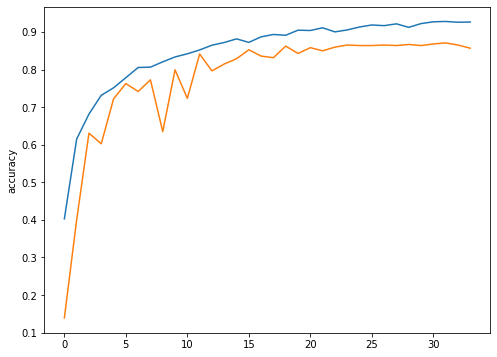

In [16]:
import seaborn as sns
plot_df = pd.DataFrame(history.history)
plt.figure(figsize=(8,6))
sns.lineplot(y=plot_df.accuracy, x = plot_df.index)
sns.lineplot(y=plot_df.val_accuracy, x = plot_df.index)

### Part 6:
Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [17]:
from sklearn import metrics
preds = model.predict(x_test)
print('Accuracy on test data:', metrics.accuracy_score(y_test, np.array(preds).round()))

preds_final = list(np.zeros((preds.shape[0],1)))
y_test_cat = list(np.zeros((preds.shape[0],1)))

num = 0
for pred in preds_final:
  preds_final[num] = labels_ohe.columns[preds[num].argmax()]
  y_test_cat[num] = labels_ohe.columns[np.array(y_test)[num].argmax()]
  num+=1

Accuracy on test data: 0.8401122019635343


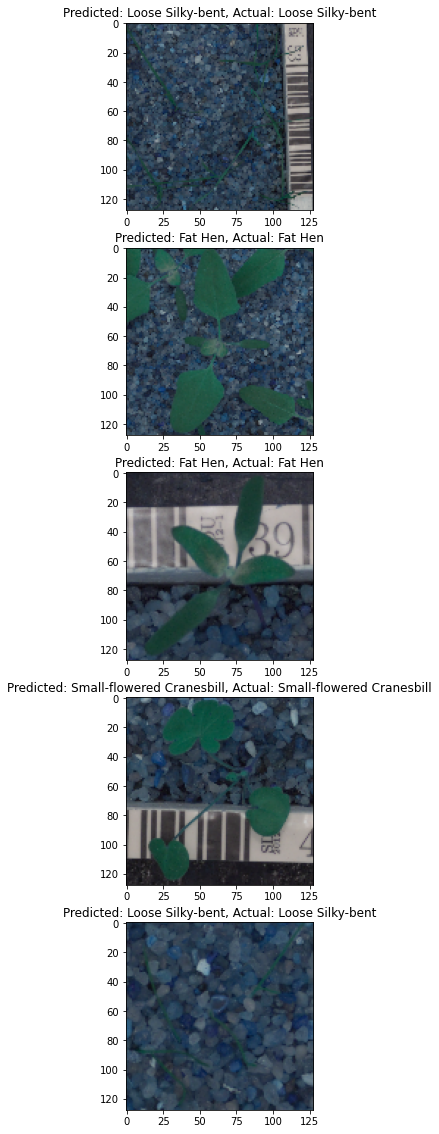

In [18]:
def make_title(num):
  out = 'Predicted: ' + preds_final[num] + ', Actual: ' + y_test_cat[num]
  return out
fig, ax = plt.subplots(5,1, figsize=(10,20))
ax[0].imshow(x_test[2])
ax[0].set_title(make_title(2))
ax[1].imshow(x_test[3])
ax[1].set_title(make_title(3))
ax[2].imshow(x_test[33])
ax[2].set_title(make_title(33))
ax[3].imshow(x_test[36])
ax[3].set_title(make_title(36))
ax[4].imshow(x_test[59])
ax[4].set_title(make_title(59));

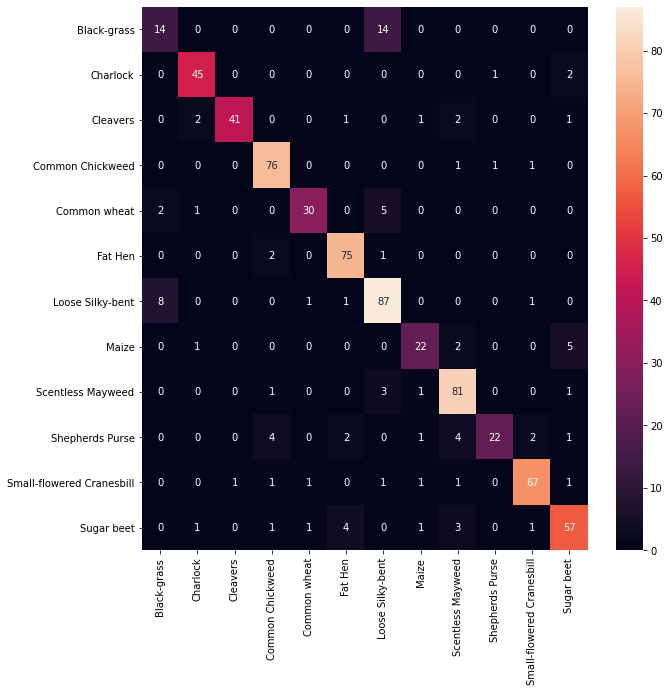

In [19]:
# It is worth noting that after every expirement with different archetectures and training methods
# Loose-Silky Bent was still most frequently misclassified
from tensorflow import math
plt.figure(figsize=(10,10))
sns.heatmap(metrics.confusion_matrix(y_test_cat, preds_final), annot=True, yticklabels=labels_ohe.columns, xticklabels=labels_ohe.columns);